In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('weather_2012.csv', parse_dates=True, index_col='Date/Time')

In [6]:
df.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
df.shape

(8784, 7)

In [2]:
# works only for month right now
def line_chart(df,period,col):
    """ A line chart that visualizes the readings in the months
    
    This function accepts the dataframe df ,period(day/month/year) and col(feature), which plots the aggregated value of the 
    feature based on the periods. Ensure the period labels are properly named.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    period - Period of time over which you want to aggregate the data
    col - Feature of the dataframe
    
    """
    if period == 'Month':
        data = df.groupby(df.index.month).mean()
    elif period == 'Day':
        data = df.groupby(df.index.day).mean()
    elif period == "Year":
        data = df.groupby(df.index.year).mean()   

    calendar_months= calendar.month_name[1:] 
    x_series = calendar_months
    y_series = data[col]       
    
    plt.plot(x_series, y_series)
    plt.title('Temperature Trend, 2012' )
    plt.xlabel(period)
    plt.xticks(rotation=90)
    plt.ylabel(col)

    plt.show()



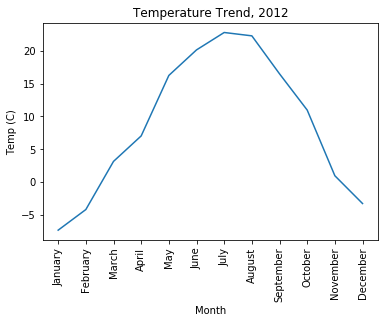

In [8]:
line_chart(df,'Month','Temp (C)')

In [11]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(df):
    """ Univariate analysis of categorical columns
    
    This function accepts the dataframe df which analyzes all the variable in the data and performs the univariate analysis using bar plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                df[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                df[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                df[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.show()
        



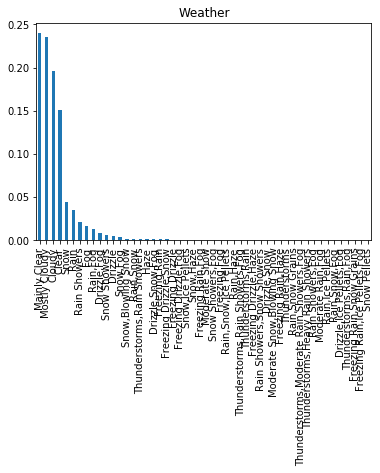

In [12]:
plot_categorical_columns(df)

In [13]:
# Function to plot continous plots
def plot_cont(df,plt_typ):
    """ Univariate analysis of Numerical columns
    
    This function accepts the dataframe df, plt_type(boxplot/distplot) which analyzes all the variable in the data and performs the univariate analysis using boxplot or distplot plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    plt_type - type of plot through which you want to visualize the data
    
    """
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    df = df[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            
            if plt_typ == "boxplot": 
                sns.boxplot(df[numeric_columns[i]])
                plt.subplot(122)            
                sns.boxplot(df[numeric_columns[i+1]])
            elif plt_typ == "distplot":
                sns.distplot(df[numeric_columns[i]])
                plt.subplot(122)            
                sns.distplot(df[numeric_columns[i+1]])  
            else:
                print("Pass either distplot/boxplot")
                
        plt.tight_layout()
        plt.show()

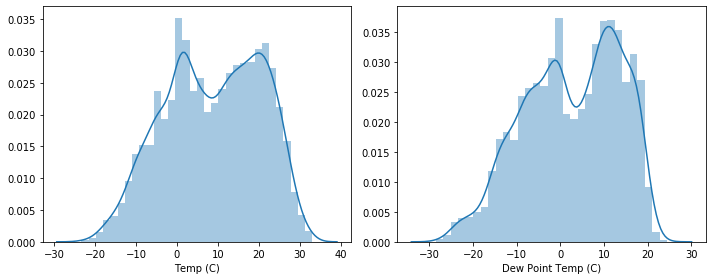

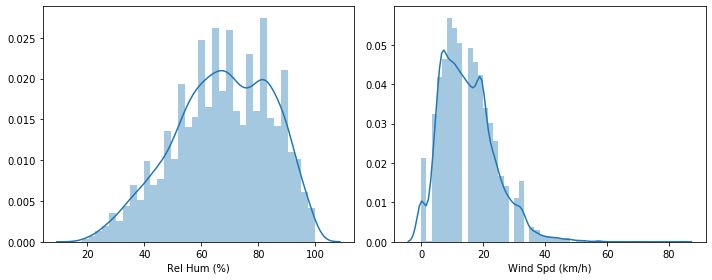

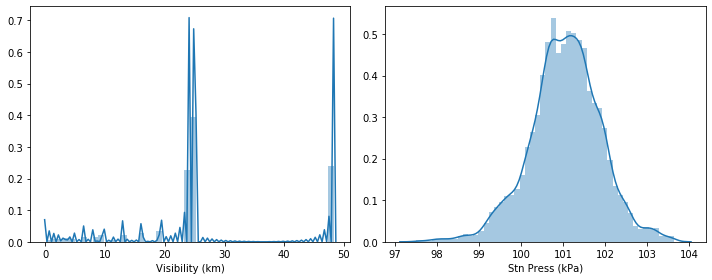

In [15]:
# Let's plot the Univariate analysis of Numerical columns.
# Call the function "plot_cont()" with the appropriate parameters to plot distplot
plot_cont(df,"distplot")

In [16]:
# Function to plot grouped values based on the feature
def group_values(df,col1,agg1,col2):
    """ Agrregate values by grouping
    
    This function accepts a dataframe, 2 column(feature) and aggregated function(agg1) which groupby the dataframe based on the column and plots the bar plot.
   
    Keyword arguments:
    df - Pandas dataframe which has the data.
    col1 - Feature of the dataframe on which values will be aggregated.
    agg1 - Dictionary of aggregate functions with feature as the key and func as the value
    col2 - Feature of the dataframe to be plot against grouped data.
    
    Returns:
    grouping - Dataframe with all columns on which it is grouped on.
    """
    aggregate = {'mean':np.mean,'max':np.max,'min':np.min}
    grouping = df.groupby(col1).agg(aggregate[agg1])
    plt.figure(figsize=(10,4))
    plt.ylabel(col2)
    grouping[col2].plot(kind="bar")
    plt.show()

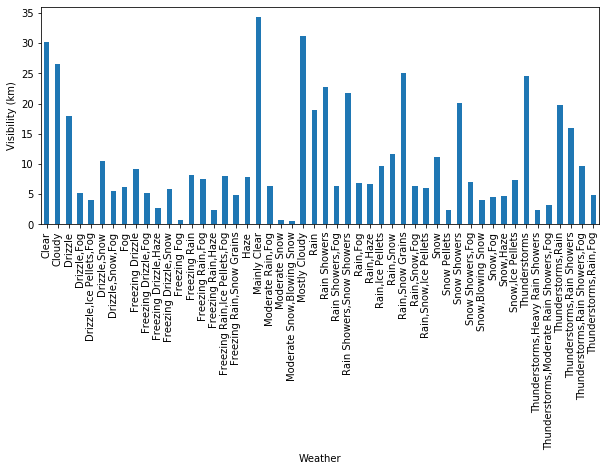

In [17]:
# Groupby the data by Weather and plot the graph of the mean visibility during different weathers. Call the function group_values to plot the graph.
# Feel free to try on diffrent features and aggregated functions like max, min.
group_values(df,"Weather","mean","Visibility (km)")